In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/yanndupis/Building-a-Student-Intervention-System/master/student-data.csv')

In [3]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,no,5,5,4,4,5,4,11,no
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,3,yes
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,5,5,3,3,3,3,3,no
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,no,4,4,1,3,4,5,0,yes


In [4]:
X=df.drop(['passed'],axis=1) # Deletando coluna 'passed'

In [5]:
y=df['passed']

In [6]:
X_onehot=pd.get_dummies(X)

In [7]:
X_onehot

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,...,1,0,0,1,0,1,1,0,1,0
391,17,3,1,2,1,0,2,4,5,3,...,1,0,1,0,0,1,0,1,1,0
392,21,1,1,1,1,3,5,5,3,3,...,1,0,1,0,0,1,1,0,1,0
393,18,3,2,3,1,0,4,4,1,3,...,1,0,1,0,0,1,0,1,1,0


In [8]:
from sklearn.decomposition import  PCA
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_onehot) # Transformando DF, decompondo-o em 2 colunas

In [9]:
df_pca=pd.DataFrame(X_pca,columns=['vetor1','vetor2'])


In [10]:
y_numeric=[1 if y=='yes' else 0 for y in y]

In [11]:
df_pca['passou']=y_numeric
df_pca.head(5)

,vetor1,vetor2,passou
0,0.309113,-1.029716,0
1,-1.786774,-0.497066,0
2,4.246748,0.412057,1
3,-3.759409,-2.427049,1
4,-1.755814,-1.034944,1


In [12]:
df_pca['cor']=['red' if y==0 else 'blue' for y in df_pca.passou.values]

<AxesSubplot:xlabel='vetor1', ylabel='vetor2'>

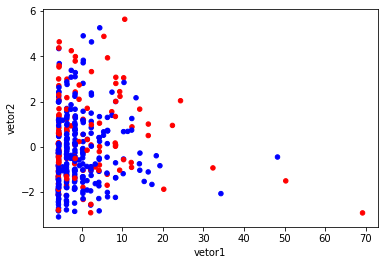

In [13]:
df_pca.plot.scatter(x='vetor1',y='vetor2',c='cor')

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_pca,y)

In [15]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          no       0.27      0.24      0.25        29
         yes       0.70      0.73      0.71        70

    accuracy                           0.59        99
   macro avg       0.48      0.48      0.48        99
weighted avg       0.57      0.59      0.58        99



In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_onehot,y)

In [18]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          no       0.67      0.26      0.37        39
         yes       0.65      0.92      0.76        60

    accuracy                           0.66        99
   macro avg       0.66      0.59      0.57        99
weighted avg       0.66      0.66      0.61        99



In [20]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[10 29]
 [ 5 55]]
